## Classification Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.color_palette("Set2")

In [2]:
df = pd.read_csv("./data/US_financial_wellbeing.csv", index_col=0)
df.head()

,FP_Score,BS_Score,FLSW_Score,UT_Score,DM_Score,IB_Score
0.0,4,4,4,3,3,3
1.0,2,2,4,5,3,4
2.0,4,4,4,4,3,3
4.0,3,3,3,4,3,3
5.0,4,4,5,5,4,4


In [3]:
df.columns = [
    "Financial_Planning",
    "Financial_Goals",
    "Analyze_Financial_Position",
    "Tax_Saving_Schemes",
    "Prompt_Installment_Payments",
    "Profile_Risk",
]

df.head()

,Financial_Planning,Financial_Goals,Analyze_Financial_Position,Tax_Saving_Schemes,Prompt_Installment_Payments,Profile_Risk
0.0,4,4,4,3,3,3
1.0,2,2,4,5,3,4
2.0,4,4,4,4,3,3
4.0,3,3,3,4,3,3
5.0,4,4,5,5,4,4


In [4]:
df.dropna(axis=0, inplace=True)
print(f"Shape: {df.shape}")

Shape: (8949, 6)


In [5]:
df.dtypes

Financial_Planning             int64
Financial_Goals                int64
Analyze_Financial_Position     int64
Tax_Saving_Schemes             int64
Prompt_Installment_Payments    int64
Profile_Risk                   int64
dtype: object

In [6]:
topic_mapping = {
    "Financial_Planning": "Financial Planning",
    "Financial_Goals": "Budget & Savings",
    "Analyze_Financial_Position": "Frugal Living and Spending Wisely",
    "Tax_Saving_Schemes": "Understanding Taxes",
    "Prompt_Installment_Payments": "Debt Management",
    "Profile_Risk": "Investment Basics",
}

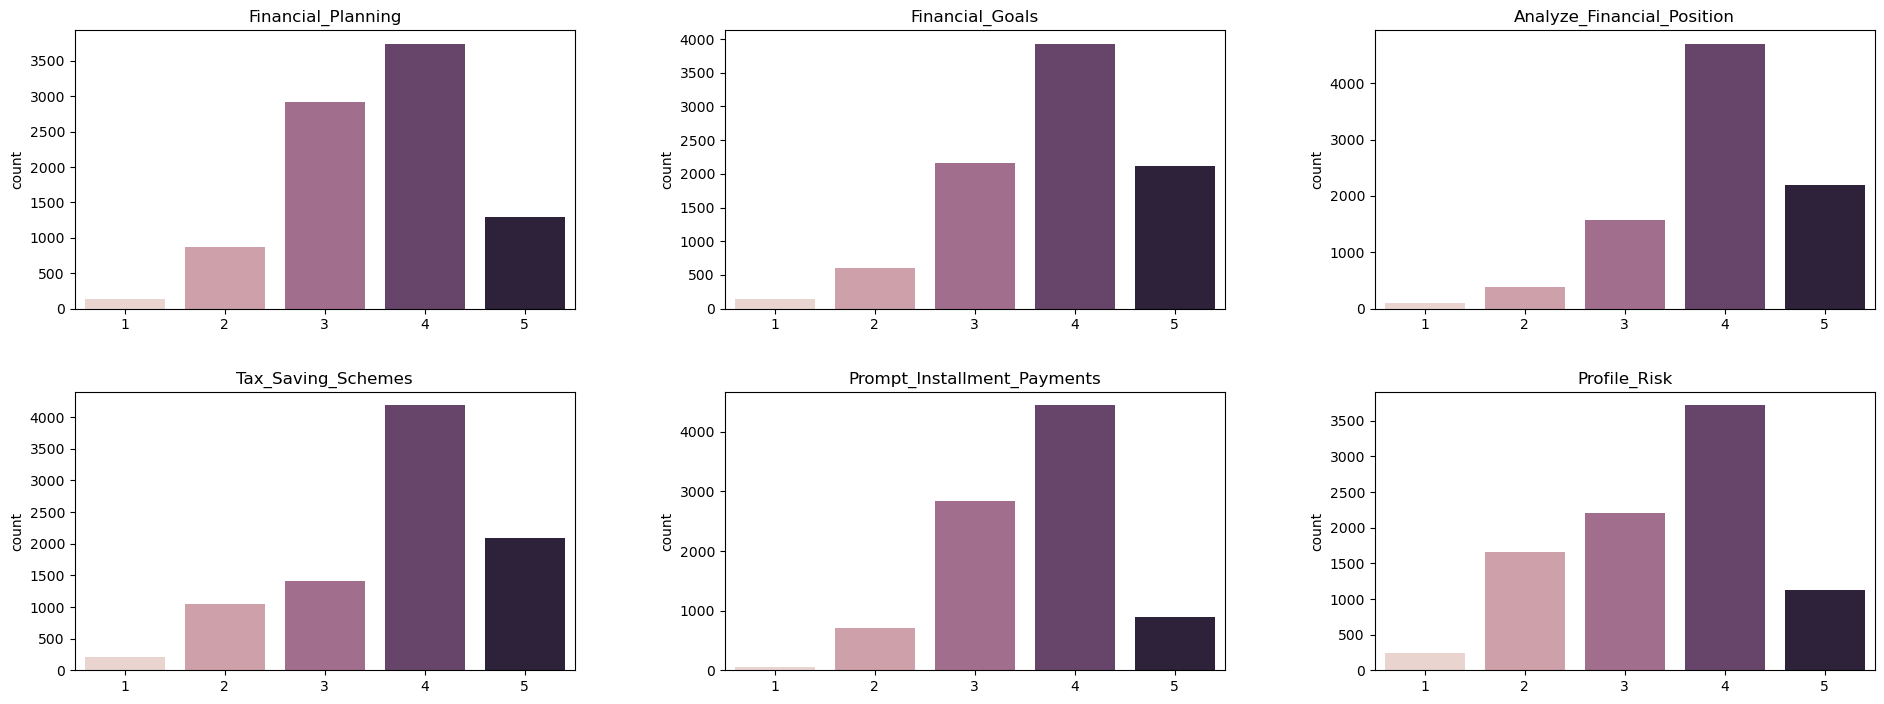

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
ax = ax.flatten()
cols = df.columns

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue=col, ax=ax[i], legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel(None)


plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()

In [8]:
# financial_literacy_dataset = pd.read_csv("./data/financial_literacy_dataset.csv")
# financial_literacy_dataset

In [9]:
def recommend_course(row, top_n=3):
    ratings = row.values.tolist()  # Convert row to a list of ratings
    min_value = min(ratings)  # Find the lowest rating
    lowest_topics = [
        col for col, rating in zip(row.index, ratings) if rating == min_value
    ]
    lowest_topics.sort()

    # Step 1: Determine the level based on ratings
    if all(rating >= 4 for rating in ratings):  # Above Beginner Level
        recommended_courses = [
            topic_mapping.get(topic, "Unknown Topic")
            for topic in [
                "Tax_Saving_Schemes",
                "Prompt_Installment_Payments",
                "Profile_Risk",
            ]
        ]
    elif all(rating < 4 for rating in ratings):  # Beginner Level
        recommended_courses = [
            topic_mapping.get(topic, "Unknown Topic")
            for topic in [
                "Financial_Planning",
                "Financial_Goals",
                "Analyze_Financial_Position",
            ]
        ]
    else:  # Mixed ratings (Edge Case Handling)
        low_ratings_indices = [i for i, rating in enumerate(ratings) if rating < 4]

        # Case 1: Only one low rating
        if len(low_ratings_indices) == 1:
            # Check if the majority of ratings are 4 or 5
            if sum(1 for rating in ratings if rating >= 4) > len(ratings) // 2:
                # More ratings >= 4, return "Above Beginner" and low ratings
                recommended_courses = [
                    topic_mapping.get(topic, "Unknown Topic")
                    for topic in [
                        "Tax_Saving_Schemes",
                        "Prompt_Installment_Payments",
                        "Profile_Risk",
                    ]
                ]
            else:
                # Otherwise, return "Beginner Level" with the lowest rating
                recommended_courses = [
                    topic_mapping.get(topic, "Unknown Topic")
                    for topic in [
                        "Financial_Planning",
                        "Financial_Goals",
                        "Analyze_Financial_Position",
                    ]
                ]
                recommended_courses.extend(
                    topic_mapping.get(topic, "Unknown Topic") for topic in lowest_topics
                )

        # Case 2: More than one low rating
        else:
            # Collect courses associated with the low ratings
            recommended_courses = [
                topic_mapping.get(row.index[i], "Unknown Topic")
                for i in low_ratings_indices
            ]

    # Remove duplicates and limit to top N recommendations
    unique_courses = sorted(set(recommended_courses))
    return ", ".join(unique_courses[:top_n])  # Limit to top N courses


# Apply the function to the dataset
df["Recommended_Course"] = df.apply(recommend_course, axis=1)

In [10]:
df.to_csv("final_dataset.csv")

In [11]:
df.head()

,Financial_Planning,Financial_Goals,Analyze_Financial_Position,Tax_Saving_Schemes,Prompt_Installment_Payments,Profile_Risk,Recommended_Course
0.0,4,4,4,3,3,3,"Debt Management, Investment Basics, Understand..."
1.0,2,2,4,5,3,4,"Budget & Savings, Debt Management, Financial P..."
2.0,4,4,4,4,3,3,"Debt Management, Investment Basics"
4.0,3,3,3,4,3,3,"Budget & Savings, Debt Management, Financial P..."
5.0,4,4,5,5,4,4,"Debt Management, Investment Basics, Understand..."


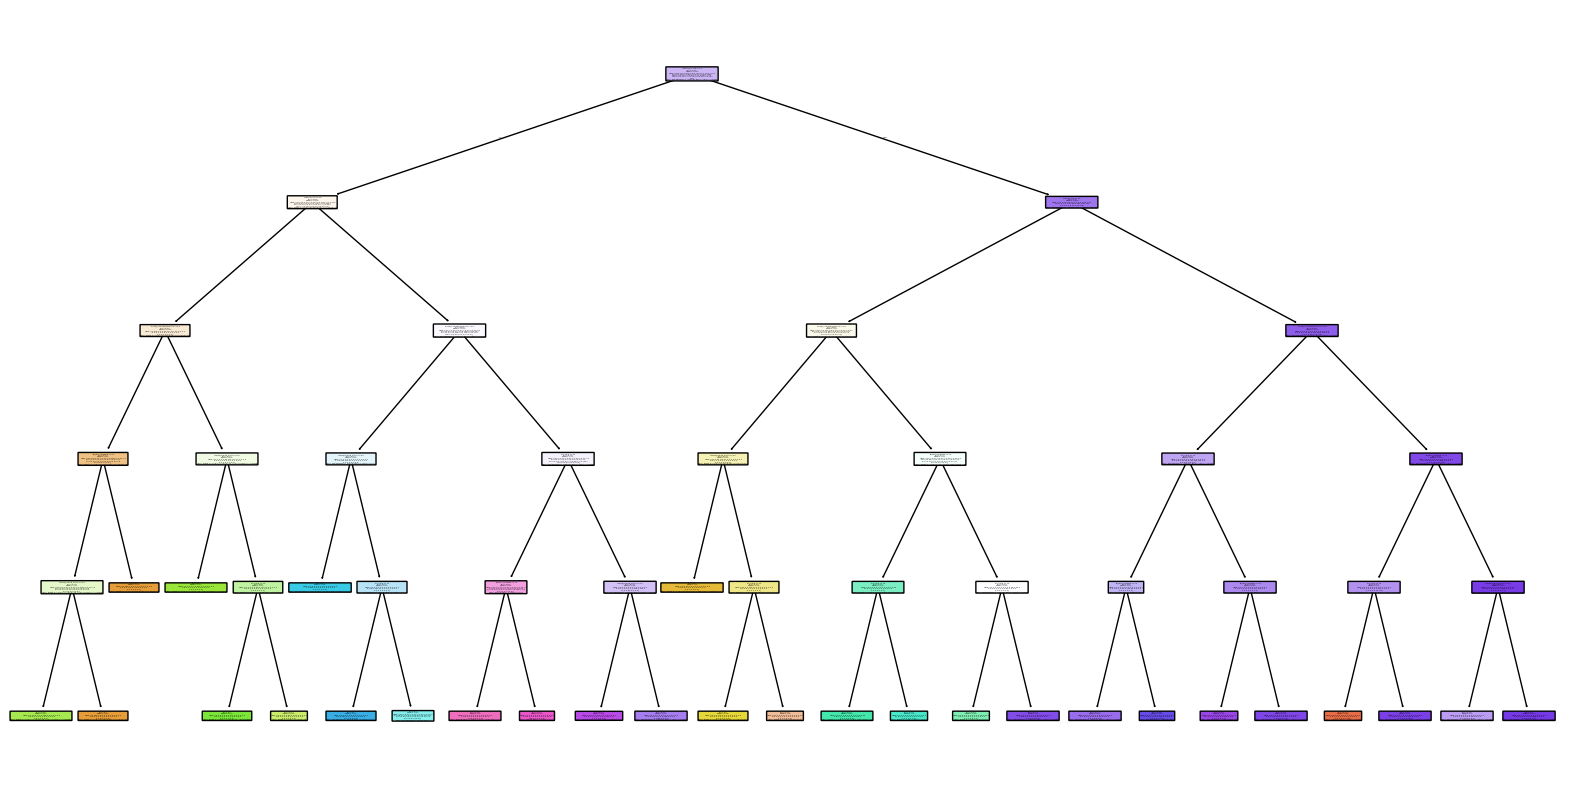

Predicted recommended course for input [[1, 3, 3, 3, 4, 4]] is: ['Budget & Savings, Financial Planning, Frugal Living and Spending Wisely']


c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Train a Decision Tree
# Prepare the feature matrix (X) and target vector (y) as done before
X = df.drop(columns=["Recommended_Course"])
y = df["Recommended_Course"]

# Split df into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and fit the Decision Tree model
decision_tree = DecisionTreeClassifier(
    max_depth=5
)  # Set max_depth for better interpretability
decision_tree.fit(X_train, y_train)

# Step 2: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=decision_tree.classes_,
    filled=True,
    rounded=True,
)
plt.show()

# Step 3: Example Prediction Explanation
# Input example
example_input = [[1, 3, 3, 3, 4, 4]]  # Substitute with any input to explain
predicted_course = decision_tree.predict(example_input)
print(f"Predicted recommended course for input {example_input} is: {predicted_course}")

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

Accuracy of the Decision Tree model: 0.9326


In [14]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import (
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     classification_report,
# )
# import pandas as pd

# X = df.drop(columns=["Recommended_Course"])
# y = df["Recommended_Course"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

In [15]:
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [16]:
# y_pred = model.predict(X_test)
# accuracy_score(y_test, y_pred), recall_score(
#     y_test, y_pred, average="micro"
# ), precision_score(y_test, y_pred, average="micro")

In [17]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # Assuming df_combined is your DataFrame containing the dataset
# X = df.drop(columns=["Recommended_Course"])
# y = df["Recommended_Course"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# # Models without hyperparameters
# models_without_hyperparams = {
#     "Random Forest": RandomForestClassifier(),
#     "SVC": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
# }

# # Models with hyperparameters
# models_with_hyperparams = {
#     "Random Forest (Tuned)": RandomForestClassifier(max_depth=10, n_estimators=50),
#     "SVC (Tuned)": SVC(random_state=42),
#     "KNN (Tuned)": KNeighborsClassifier(n_neighbors=3, weights="distance"),
#     "Decision Tree (Tuned)": DecisionTreeClassifier(max_depth=20),
# }


# # Function to evaluate models using cross-validation
# def evaluate_models_cv(models, X_train, y_train):
#     cv_results = {}
#     for name, model in models.items():
#         scores = cross_val_score(
#             model, X_train, y_train, cv=5, scoring="accuracy"
#         )  # 5-fold cross-validation
#         cv_results[name] = scores.mean()  # Average accuracy across folds
#     return cv_results


# # Evaluate both sets of models using cross-validation
# results_without_hyperparams_cv = evaluate_models_cv(
#     models_without_hyperparams, X_train, y_train
# )
# results_with_hyperparams_cv = evaluate_models_cv(
#     models_with_hyperparams, X_train, y_train
# )

# # Print the accuracy results
# print("Cross-Validated Accuracy without Hyperparameters:")
# for model_name, accuracy in results_without_hyperparams_cv.items():
#     print(f"{model_name}: {accuracy:.2f}")

# print("\nCross-Validated Accuracy with Hyperparameters:")
# for model_name, accuracy in results_with_hyperparams_cv.items():
#     print(f"{model_name}: {accuracy:.2f}")

In [18]:
# new_data = pd.DataFrame(
#     {
#         "Financial_Planning": [4],  # FP
#         "Financial_Goals": [1],  # BS
#         "Analyze_Financial_Position": [1],  # FLS
#         "Tax_Saving_Schemes": [5],  # UT
#         "Prompt_Installment_Payments": [3],  # DT
#         "Profile_Risk": [5],  # IB
#     }
# )
# mod = KNeighborsClassifier()
# mod.fit(X_train, y_train)

# new_data = new_data[X_train.columns]
# predictions = mod.predict(new_data)
# print(f"Predictions for the new data: {predictions}")

In [19]:
# df.to_csv("financial_literacy.csv")

In [20]:
# unique_courses = set()
# df["Recommended_Course"].str.split(", ").apply(unique_courses.update)

# # Create a binary column for each unique course, marking 1 if the course is recommended, 0 otherwise
# for course in unique_courses:
#     df[course] = df["Recommended_Course"].apply(lambda x: int(course in x.split(", ")))

# # Display the modified dataframe to confirm the addition of binary columns
# df.head()

In [21]:
# financial_literacy_dataset

In [22]:
# print(financial_literacy_dataset["Recommended_Course"].head(15))

In [23]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import LabelEncoder

# # Assuming your dataset is named 'financial_literacy_dataset'
# X = financial_literacy_dataset.drop(columns=["Recommended_Course"])
# y = financial_literacy_dataset["Recommended_Course"]

# # Encode the target labels (Recommended Course) since they are categorical
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Apply PCA to reduce the features to 2 dimensions
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_pca, y_encoded, test_size=0.3, random_state=42
# )

# # Create KNN, SVC, and Decision Tree models
# knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
# svc = SVC(kernel="rbf")  # Non-linear kernel (RBF)
# dtree = DecisionTreeClassifier(random_state=42)

# # Train the models
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)
# dtree.fit(X_train, y_train)

# # Create a mesh grid for plotting decision boundaries
# h = 0.02  # Step size in the mesh grid
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Predict the class labels for each point in the mesh grid
# Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_knn = Z_knn.reshape(xx.shape)

# Z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_svc = Z_svc.reshape(xx.shape)

# Z_dtree = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_dtree = Z_dtree.reshape(xx.shape)

# # Plot KNN decision boundary
# plt.figure(figsize=(18, 5))

# plt.subplot(1, 3, 1)
# plt.contourf(xx, yy, Z_knn, alpha=0.8)
# plt.scatter(
#     X_train[:, 0],
#     X_train[:, 1],
#     c=y_train,
#     edgecolors="k",
#     marker="o",
#     s=50,
#     label="Train Data",
# )
# plt.scatter(
#     X_test[:, 0],
#     X_test[:, 1],
#     c=y_test,
#     edgecolors="k",
#     marker="^",
#     s=50,
#     label="Test Data",
# )
# plt.title("K-Nearest Neighbors")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()

# # Plot SVC decision boundary
# plt.subplot(1, 3, 2)
# plt.contourf(xx, yy, Z_svc, alpha=0.8)
# plt.scatter(
#     X_train[:, 0],
#     X_train[:, 1],
#     c=y_train,
#     edgecolors="k",
#     marker="o",
#     s=50,
#     label="Train Data",
# )
# plt.scatter(
#     X_test[:, 0],
#     X_test[:, 1],
#     c=y_test,
#     edgecolors="k",
#     marker="^",
#     s=50,
#     label="Test Data",
# )
# plt.title("Support Vector Classifier (RBF Kernel)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()

# # Plot Decision Tree decision boundary
# plt.subplot(1, 3, 3)
# plt.contourf(xx, yy, Z_dtree, alpha=0.8)
# plt.scatter(
#     X_train[:, 0],
#     X_train[:, 1],
#     c=y_train,
#     edgecolors="k",
#     marker="o",
#     s=50,
#     label="Train Data",
# )
# plt.scatter(
#     X_test[:, 0],
#     X_test[:, 1],
#     c=y_test,
#     edgecolors="k",
#     marker="^",
#     s=50,
#     label="Test Data",
# )
# plt.title("Decision Tree")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [24]:
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.model_selection import train_test_split

# # Assuming financial_literacy_dataset is already defined
# X = df.drop(columns=["Recommended_Course"])
# y = df["Recommended_Course"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# # Train the decision tree classifier
# # Train the decision tree classifier with limited depth
# clf = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight="balanced")
# clf.fit(X_train, y_train)

# # Visualize the decision tree
# plt.figure(figsize=(20, 20))
# plot_tree(
#     clf,
#     filled=True,
#     feature_names=X.columns,
#     class_names=y.unique(),
#     rounded=True,
#     fontsize=12,
# )
# plt.show()

# from sklearn.metrics import classification_report

# print(classification_report(y_test, clf.predict(X_test), zero_division=1))

In [26]:
df["Recommended_Course"].unique()

array(['Debt Management, Investment Basics, Understanding Taxes',
       'Budget & Savings, Debt Management, Financial Planning',
       'Debt Management, Investment Basics',
       'Debt Management, Financial Planning',
       'Investment Basics, Understanding Taxes',
       'Debt Management, Financial Planning, Investment Basics',
       'Budget & Savings, Financial Planning, Understanding Taxes',
       'Budget & Savings, Financial Planning, Frugal Living and Spending Wisely',
       'Debt Management, Understanding Taxes',
       'Budget & Savings, Financial Planning',
       'Financial Planning, Investment Basics',
       'Financial Planning, Understanding Taxes',
       'Budget & Savings, Financial Planning, Investment Basics',
       'Budget & Savings, Debt Management, Investment Basics',
       'Budget & Savings, Frugal Living and Spending Wisely, Investment Basics',
       'Financial Planning, Frugal Living and Spending Wisely',
       'Debt Management, Financial Planning, Unde